ValueError: x attribute access only provided for Point geometries

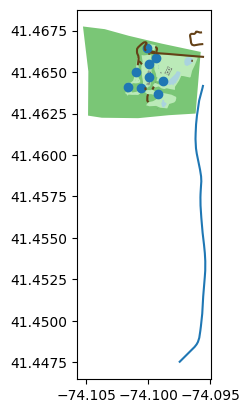

In [3]:
import matplotlib.pyplot as plt
import osmnx as osm
import numpy as np
import geopandas
import pandas

# USER SETTINGS
    #Asks user for color or black and white
colorindex = 0
    #Asks user for number of grid marks
gridlines = 20

# SET POINTS OF INTEREST
#Retrieve named points
#Plot named points as dots, with labels according

# IMPORT BOUNDING BOX
north = 41.466901
south = 41.462273
east = -74.09598
west = -74.102378

# COLOR LIBRARY
    # set 0 for color and 1 for BW
forestcolor = ['#7AC676', '#EAEAEA']
roadcolor = ['#644117', '#7f7f7f']
grasscolor = ['#BBEAB8', '#EAEAEA']
buildingcolor = ['#696969', '#939393']
watercolor = ['#aad3df', '#dddbdb']

# TAG LIST
buildingtags = {'building': True}
grasstags = {'landuse': ['grass', 'recreation_ground']}
roadtags = {'highway': ['track', 'footway', 'service'], 'amenity': 'parking'}
watertags = {'natural': 'water'}
foresttags = {'natural': 'wood'}
nametags = {'name': True}

# IMPORT GEODATA
forest = osm.features_from_bbox(north, south, east, west, foresttags)
grass = osm.features_from_bbox(north, south, east, west, grasstags)
water = osm.features_from_bbox(north, south, east, west, watertags)
roads = osm.features_from_bbox(north, south, east, west, roadtags)
buildings = osm.features_from_bbox(north, south, east, west, buildingtags)
names = osm.features_from_bbox(north, south, east, west, nametags)

# CREATE PLOTS IN LAYERS
    # plots hatched forest for black and white
if colorindex == 1:
    forestplot = forest.plot(color=forestcolor[colorindex], edgecolor="black")
else:
    forestplot = forest.plot(color=forestcolor[colorindex])

    # plots border around grass if black and white
if colorindex == 1:
    grassplot = grass.plot(ax=forestplot, color=grasscolor[colorindex], edgecolor="black")
else:
    grassplot = grass.plot(ax=forestplot, color=grasscolor[colorindex])

waterplot = water.plot(ax=grassplot, color=watercolor[colorindex])
roadsplot = roads.plot(ax=waterplot, color=roadcolor[colorindex])
buildingplot = buildings.plot(ax=roadsplot, marker='o', color=buildingcolor[colorindex], markersize=5)
namesplot = names.plot(ax=buildingplot)


finalplot = buildingplot

for x, y, label in zip(names.geometry.x, names.geometry.y, names.name):
    namesplot.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points")

# TICK CALCULATIONS

    # Calculates the division between ticks
ytickdiv = (north-south)/gridlines
xtickdiv = (east-west)/gridlines

    # Calculates 0.5 tick measurement for the minor tick offset
half_y_tickdiv = ytickdiv/2
half_x_tickdiv = xtickdiv/2

    # Sets the MAJOR ticks (for grid)
yticklist = []
xticklist = []

for number in list(range(gridlines)):
    yticklist.append(south+ytickdiv*number)
    xticklist.append(west+xtickdiv*number)

    # Sets the MINOR ticks (for labels)
yticklist_minor = []
xticklist_minor = []

for number in list(range(gridlines)):
    yticklist_minor.append(south+half_y_tickdiv+ytickdiv*number)
    xticklist_minor.append(west+half_x_tickdiv+xtickdiv*number)

    # LETTER GRIDLINES - Generates list of capital letters to use for letter labeling
lastletter = 97 + gridlines
xticklabels = list(map(chr, range(97, lastletter)))
xticklabels = list(map(str.upper, xticklabels))

    # NUMBERED GRIDLINES - Generates list of numbers for use with number labels
yticklabels = list(range(gridlines))

    # Creates the MINOR ticks for labeling
plt.yticks(yticklist_minor, yticklabels, minor=True)
plt.xticks(xticklist_minor, xticklabels, minor=True)

    # Creates the MAJOR ticks for the grid
    # Sets a blank list because otherwise labels are auto-written, even if labels=None
blank = []
plt.yticks(yticklist, blank)
plt.xticks(xticklist, blank)


# PLOT INITIALIZATION
# finalplot.set_facecolor((backgroundcolor[colorindex]))
plt.grid(which='major', linestyle='-', lw=0.5, color='grey')
plt.xlim(west, east)
plt.ylim(south, north)



plt.show()


In [3]:
names

addr:city addr:housenumber addr:postcode  \
element_type osmid                                                     
node         8788848014   New Windsor            380 B         12553   
             9709411318   New Windsor              380         12553   
             11186668406          NaN              NaN           NaN   
             11186668407          NaN              NaN           NaN   
             11186668408          NaN              NaN           NaN   
             11186668409          NaN              NaN           NaN   
             11186668410          NaN              NaN           NaN   
             11186668411          NaN              NaN           NaN   
             11186668412          NaN              NaN           NaN   
way          20672565             NaN              NaN           NaN   
             1050082665   New Windsor              380         12553   
             1050082718           NaN              NaN           NaN   
             1050082719           NaN              NaN           NaN   
             1050082727           NaN              NaN           NaN   
             1050094736           NaN              NaN           NaN   

                         addr:state      addr:street  \
element_type osmid                                     
node         8788848014          NY  Mount Airy Road   
             9709411318          NY  Mount Airy Road   
             11186668406        NaN              NaN   
             11186668407        NaN              NaN   
             11186668408        NaN              NaN   
             11186668409        NaN              NaN   
             11186668410        NaN              NaN   
             11186668411        NaN              NaN   
             11186668412        NaN              NaN   
way          20672565           NaN              NaN   
             1050082665          NY  Mount Airy Road   
             1050082718         NaN              NaN   
             1050082719         NaN              NaN   
             1050082727         NaN              NaN   
             1050094736         NaN              NaN   

                                                    name  \
element_type osmid                                         
node         8788848014                  Grouchy Airsoft   
             9709411318             Zulu24 Airsoft Field   
             11186668406                          mosque   
             11186668407                  CONEX / Castle   
             11186668408                        CQB City   
             11186668409                      Helicopter   
             11186668410                         Village   
             11186668411                      Fuel Depot   
             11186668412                         Embassy   
way          20672565                     Bethlehem Road   
             1050082665                  Grouchy Airsoft   
             1050082718                            Truck   
             1050082719                            Truck   
             1050082727                            Truck   
             1050094736   Chronograph and Shooting Range   

                         nysgissam:nysaddresspointid    shop  \
element_type osmid                                             
node         8788848014                   ORAN121972  sports   
             9709411318                          NaN     NaN   
             11186668406                         NaN     NaN   
             11186668407                         NaN     NaN   
             11186668408                         NaN     NaN   
             11186668409                         NaN     NaN   
             11186668410                         NaN     NaN   
             11186668411                         NaN     NaN   
             11186668412                         NaN     NaN   
way          20672565                            NaN     NaN   
             1050082665                          NaN     yes 

In [60]:
#for every item in geometry column, lstrip(POINT ( and rstrip)

In [4]:
names = names.loc['node', ['name','geometry']]

In [5]:
names

,name,geometry
osmid,,
8788848014,Grouchy Airsoft,POINT (-74.09936 41.46586)
9709411318,Zulu24 Airsoft Field,POINT (-74.10008 41.46644)
11186668406,mosque,POINT (-74.10095 41.46498)
11186668407,CONEX / Castle,POINT (-74.09992 41.46550)
11186668408,CQB City,POINT (-74.09998 41.46468)
11186668409,Helicopter,POINT (-74.09882 41.46445)
11186668410,Village,POINT (-74.10159 41.46407)
11186668411,Fuel Depot,POINT (-74.10062 41.46406)
11186668412,Embassy,POINT (-74.09925 41.46367)


In [9]:
names['geometry']

osmid
8788848014     POINT (-74.09936 41.46586)
9709411318     POINT (-74.10008 41.46644)
11186668406    POINT (-74.10095 41.46498)
11186668407    POINT (-74.09992 41.46550)
11186668408    POINT (-74.09998 41.46468)
11186668409    POINT (-74.09882 41.46445)
11186668410    POINT (-74.10159 41.46407)
11186668411    POINT (-74.10062 41.46406)
11186668412    POINT (-74.09925 41.46367)
Name: geometry, dtype: geometry